- Numerical Differentiation and Integration


In [1]:
import math
import numpy as np
import scipy.interpolate
import itertools as it
import matplotlib.pyplot as pp

# Task A: Simpson Integration
![](2022-11-04-21-23-38.png)

In [2]:
def simpsons(a,b,c,h):
    i = h*(1/3*a+4/3*b+1/3*c)
    return i

In [3]:
def my_function(x):
    ## my function is currently a sin
    return math.sin(x)
    

In [4]:
## the limits of the interval and function is passed into our simpsons function
## the default starting value for the subinterval number is n=2 subintervals, m = 1 cubic approximations
## if desired accuracy is not achieved the function will call itself with double the prevoious value of n 

def compound_simpsons(A, B,function, a, n=2):
    #check that n is even , else add 1
    if (n%2 !=0):
        n += 1
    # determine the spacing
    h =  (B-A)/n 
    xnodes = np.arange(A,B+h,h) # create array of xnodes
    ynodes = []
    for i in range (0, len(xnodes)):
        ynodes += [function(xnodes[i])] # create and fill list of ynodes
        
    #initialize result and add the first and last ynodes
    result = 0
    result += ynodes[0] + ynodes[-1]
    
    # add 4*odd numbered y values
    for i in range(1,len(ynodes)-1,2):
        result += 4*ynodes[i]
        
    ## add 2* even numbered nodes to the result
    for i in range(2,len(ynodes)-2,2):
        result += 2*ynodes[i]
        
    # Multiply result by h/3 and return
    result *= h/3
    
    
#     true_value = compound_simpsons(A,B,function, 9, n= 98)
    
#     error = result - true_value
#     print(error)
    return result

#     if (abs(error) >= a):
#         print("Error is  {}".format(error))
#         compound_simpsons(A,B,function,a, n = 2*n)
#     else:
#         return result
        
        
    
    
## must add accuracy checking mechanism
## But how to determine real value?
    ## maybe calculate true value with 9999999 subintervals and compare to our value

In [5]:
compound_simpsons(0,math.pi,my_function, 1,9)

2.0001095173150043

# Task B: K-th order derivative
![](2022-11-04-21-24-10.png)


In [7]:
# use the forward method, k = order
def Derivative(k, nodes):
    n = len(nodes)
    if ( n <= k ):
        return 0
    h = nodes[1]- nodes[0]
    delta = 0
    for i in range (0,k):
        delta += len(list(it.combinations(np.arange(0,k,1),i))) * (-1)**i * nodes[0+k-i]
    result = delta/(h**k)
    return result
        
## Need some values to test this

In [8]:
Derivative(3,[1,2,3,4,5,6,7,8,9])

1.0

# Task C: Smoothing derivatives with polynomial interpolation
![](2022-11-04-21-24-29.png)

In [9]:
x = np.linspace(0,np.pi,10)
y = np.sin(x)
y

array([0.00000000e+00, 3.42020143e-01, 6.42787610e-01, 8.66025404e-01,
       9.84807753e-01, 9.84807753e-01, 8.66025404e-01, 6.42787610e-01,
       3.42020143e-01, 1.22464680e-16])

In [10]:
dy = Derivative(5,y)
dy


## create a list with the third derivatives at each point
dlist = []
for i in range(0,len(y)):
    ylist= y[0:i]
    dlist = dlist + [Derivative(5,ylist)]

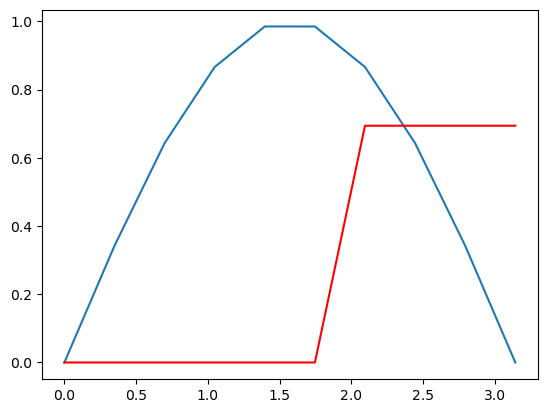

In [11]:
pp.plot(x,y)
pp.plot(x,dlist, color="red")

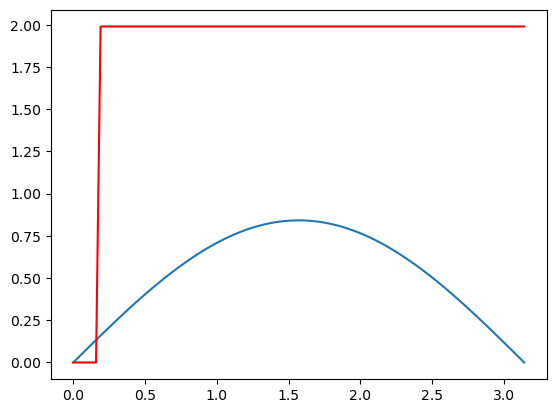

In [12]:
l = scipy.interpolate.lagrange(x,y)

xnew = np.linspace(0,np.pi,100)
ynew = np.zeros(100)

for i in range (0,len(xnew)):
    temp = 0
    for j in range (0,len(x)):
        temp += np.sin(xnew[i])*l[j]
    ynew[i] = temp
    

pp.plot(xnew,ynew)

dnew = []
for i in range(0,len(ynew)):
    ylist= ynew[0:i]
    dnew = dnew + [Derivative(5,ylist)]



pp.plot(xnew,dnew, color="red")